In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()
 
import datetime
 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
 
import statsmodels.api as sm 
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


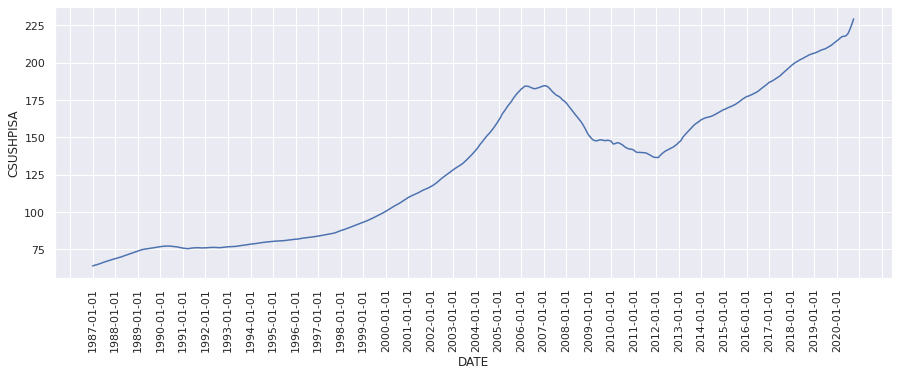

In [ ]:
HPI=pd.read_csv("CSUSHPISA.csv")
#print(HPI.head())
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
ax1 = plt.subplot()
sns.lineplot(x=HPI['DATE'],y=HPI['CSUSHPISA'] ,color="b",ax=ax1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(12))

 The Home Price Index have seen a downfall inbetween 2006 Q4  & 2012 Q1
 
 Source:   http://www.stockpickssystem.com/housing-market-crash-2007/
 
           https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.519.8817&rep=rep1&type=pdf 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


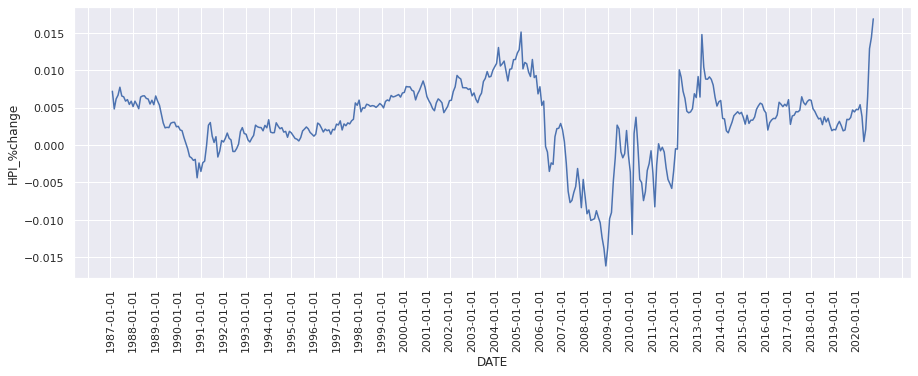

In [ ]:
HPI['HPI_%change']=HPI['CSUSHPISA'].pct_change()
HPI.head(10)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
ax2 = plt.subplot()
sns.lineplot(x=HPI['DATE'],y=HPI['HPI_%change'] ,color="b",ax=ax2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(12))

# US Population vs Home Price Index

         DATE  Population
0  1987-01-01    241857.0
1  1987-02-01    242005.0
2  1987-03-01    242166.0
3  1987-04-01    242338.0
4  1987-05-01    242516.0


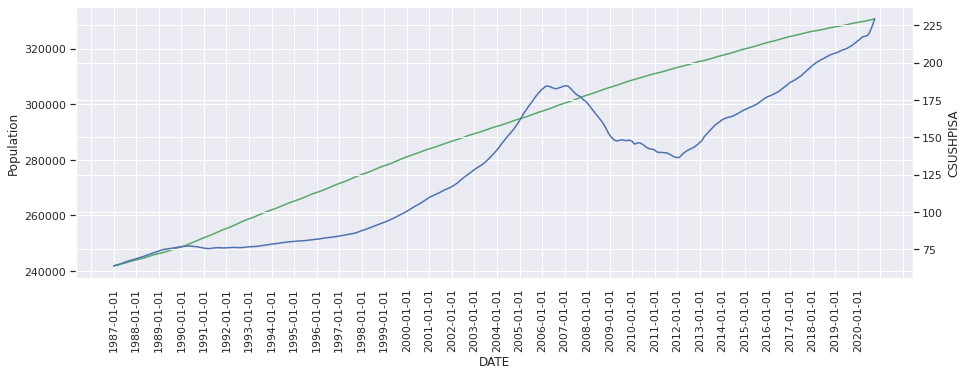

In [ ]:
Population=pd.read_csv("Fred-population_monthly.csv",names=['DATE','Population'],header=0)
print(Population.head())

Pop_HPI=pd.merge(Population,HPI,on='DATE',how='inner')
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)

sns.lineplot(x=Pop_HPI['DATE'],y=Pop_HPI['Population'] ,color="g")
ax2 = plt.twinx()
sns.lineplot(x=Pop_HPI['DATE'],y=Pop_HPI['CSUSHPISA'], color="b",ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(12))

Above plot infers that the home price index is following the growth of  Population.
Population growth tends to increase the demand for housing, thus the house price increases. Home price index increase as population grow

# GDP vs Home Price Index

         DATE       GDP
0  1987-01-01  4722.156
1  1987-04-01  4806.160
2  1987-07-01  4884.555
3  1987-10-01  5007.994
4  1988-01-01  5073.372


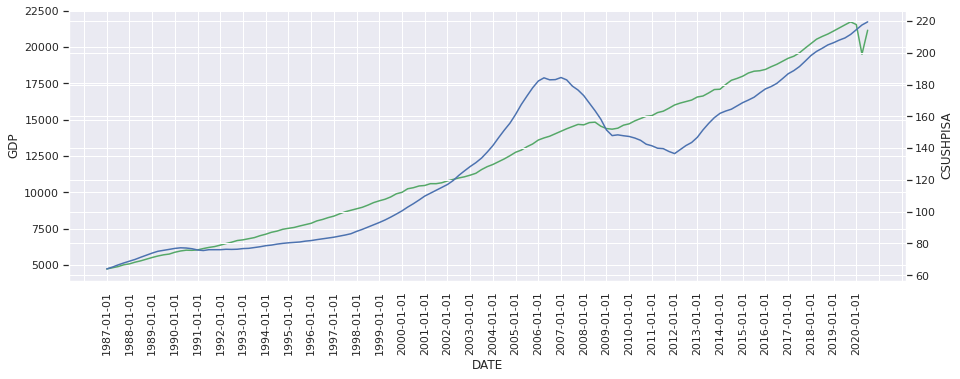

In [ ]:
GDP=pd.read_csv('Fred-GDP_quaterly.csv')
print(GDP.head())

GDP_HPI=pd.merge(GDP,HPI,on='DATE',how='inner')
GDP_HPI.head()
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.lineplot(x=GDP_HPI['DATE'],y=GDP_HPI['GDP'] ,color="g")
ax2 = plt.twinx()
sns.lineplot(x=GDP_HPI['DATE'],y=GDP_HPI['CSUSHPISA'], color="b",ax=ax2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))

From the plot(while, HPI is following GDP), we can infer higher GDP increases the income of the residents of a country and subsequently increases the demand for houses. In the process, it increases the house prices.

# Household Income vs Home Price Index

         DATE  Household_Income
0  1987-01-01             56261
1  1988-01-01             56725
2  1989-01-01             57705
3  1990-01-01             56966
4  1991-01-01             55302


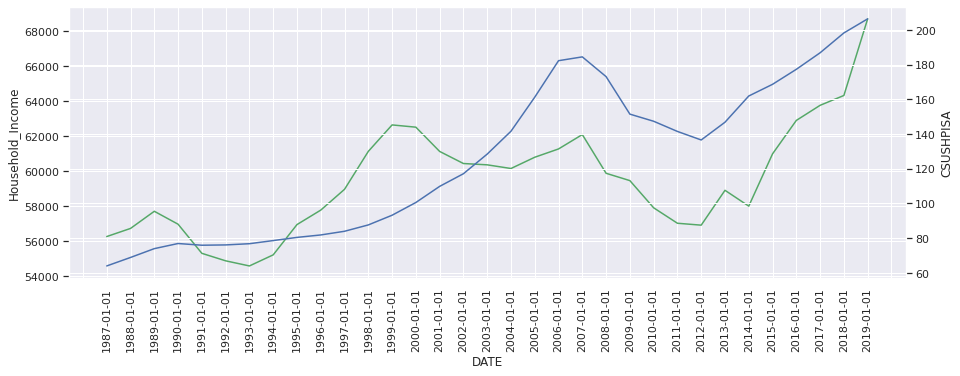

In [ ]:
Income=pd.read_csv('Fred-household_income_Annual.csv',names=['DATE','Household_Income'],header=0)
print(Income.head())

Income_HPI=pd.merge(Income,HPI,on='DATE',how='inner')
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.lineplot(x=Income_HPI['DATE'],y=Income_HPI['Household_Income'],color='g')
ax2=plt.twinx()
sns.lineplot(x=Income_HPI['DATE'],y=Income_HPI['CSUSHPISA'],color='b',ax=ax2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

With the rising incomes, people will be able to spend more on houses, this will increase demand and push up prices.

# Income Tax vs Home Price Index

         DATE  Income_Tax
0  1987-01-01        38.5
1  1988-01-01        28.0
2  1989-01-01        28.0
3  1990-01-01        28.0
4  1991-01-01        31.0
         DATE  Income_Tax  CSUSHPISA  HPI_%change
0  1987-01-01        38.5     63.965          NaN
1  1988-01-01        28.0     68.859     0.005138
2  1989-01-01        28.0     73.947     0.006561
3  1990-01-01        28.0     76.897     0.002503
4  1991-01-01        31.0     75.914    -0.003531


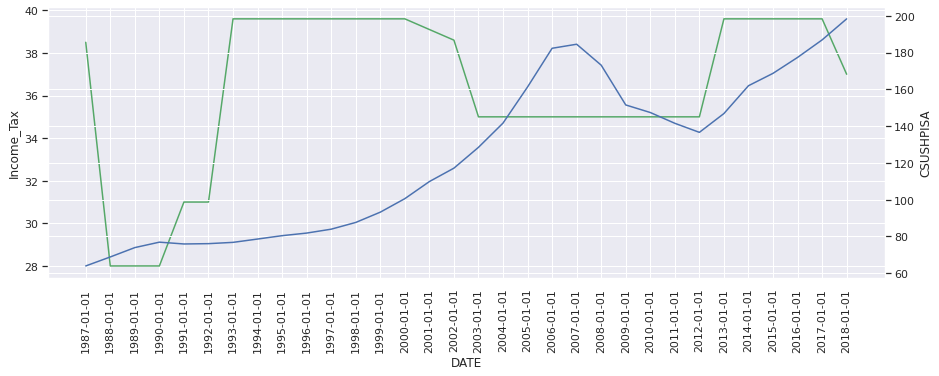

In [ ]:
Income_tax=pd.read_csv('Fred-Incometax_Annual.csv',names=['DATE','Income_Tax'],header=0)
print(Income_tax.head())

I_Tax_HPI=pd.merge(Income_tax,HPI,on='DATE',how='inner')
print(I_Tax_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)

sns.lineplot(x=I_Tax_HPI['DATE'],y=I_Tax_HPI['Income_Tax'],color='g')
ax2=plt.twinx()
sns.lineplot(x=I_Tax_HPI['DATE'],y=I_Tax_HPI['CSUSHPISA'],color='b',ax=ax2)

# Property Tax vs Home Price Index

           DATE  Proprty_Tax_Rate
933  1987-01-01             2.770
934  1988-01-01             2.779
935  1989-01-01             2.787
936  1990-01-01             3.059
937  1991-01-01             3.195
         DATE  Proprty_Tax_Rate  CSUSHPISA  HPI_%change
0  1987-01-01             2.770     63.965          NaN
1  1988-01-01             2.779     68.859     0.005138
2  1989-01-01             2.787     73.947     0.006561
3  1990-01-01             3.059     76.897     0.002503
4  1991-01-01             3.195     75.914    -0.003531


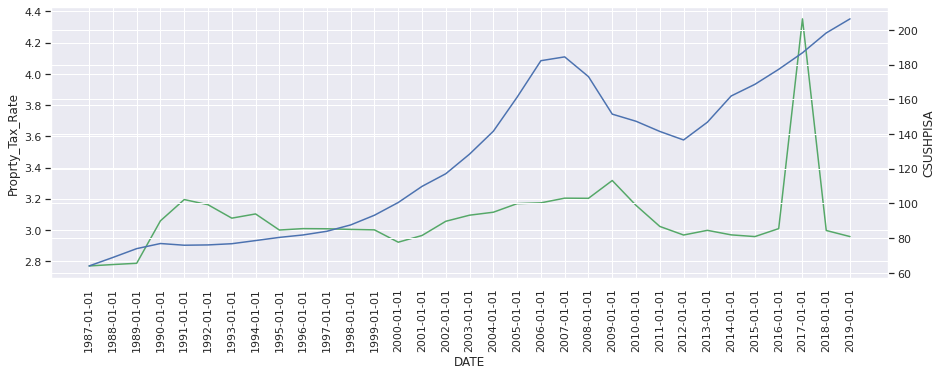

In [ ]:
Property_tax=pd.read_csv('OECD_Property Tax.csv',usecols=['LOCATION','TIME','Value'])#,names=['LOCATION','DATE','Proprty_Tax'],header=0)
Property_tax.columns=['LOCATION','DATE','Proprty_Tax_Rate']
Property_tax=Property_tax[Property_tax['LOCATION']=='USA']
Property_tax.drop('LOCATION',axis=1,inplace=True)
Property_tax['DATE'] = Property_tax['DATE'].apply(lambda x: str(x)+'-01-01')
print(Property_tax.head())

P_Tax_HPI=pd.merge(Property_tax,HPI,on='DATE',how='inner')
print(P_Tax_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
#'Proprty_Tax_Rate (%)'
sns.lineplot(x=P_Tax_HPI['DATE'],y=P_Tax_HPI['Proprty_Tax_Rate'],color='g')
ax2=plt.twinx()
sns.lineplot(x=P_Tax_HPI['DATE'],y=P_Tax_HPI['CSUSHPISA'],color='b',ax=ax2)

# Employment Rate  vs  Home Price Index

         DATE  Employment_rate
0  1987-01-01        70.151216
1  1987-02-01        70.283076
2  1987-03-01        70.316102
3  1987-04-01        70.513478
4  1987-05-01        70.809460
         DATE  Employment_rate  CSUSHPISA  HPI_%change
0  1987-01-01        70.151216     63.965          NaN
1  1987-02-01        70.283076     64.425     0.007191
2  1987-03-01        70.316102     64.736     0.004827
3  1987-04-01        70.513478     65.135     0.006163
4  1987-05-01        70.809460     65.569     0.006663


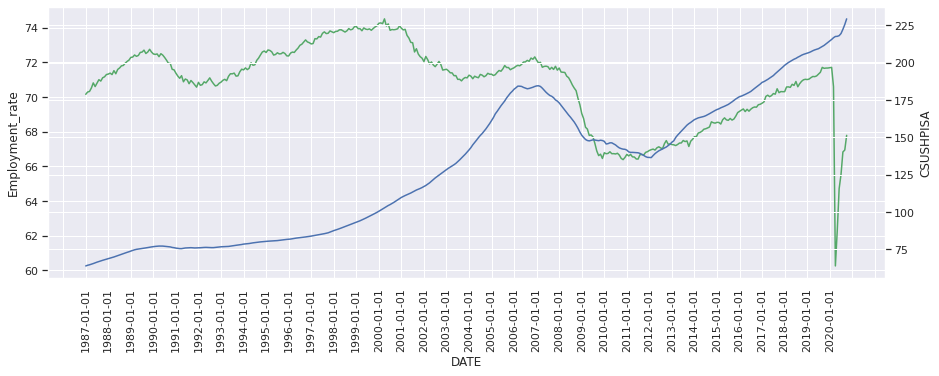

In [ ]:
Employment_rate=pd.read_csv('Fred-Employmentrate_monthly.csv',names=['DATE','Employment_rate'],header=0)
print(Employment_rate.head())

Emp_rate_HPI=pd.merge(Employment_rate,HPI,on='DATE',how='inner')
print(Emp_rate_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
#'Employment_rate(%)
sns.lineplot(x=Emp_rate_HPI['DATE'],y=Emp_rate_HPI['Employment_rate'],color='g')
ax2=plt.twinx()
sns.lineplot(x=Emp_rate_HPI['DATE'],y=Emp_rate_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(12))

Employment Rate have a positive impact on house prices. House Price Increased while there is a  increase in  employment Rate except in the pandemic(COVID-19), as people understand the need.  

# FDI vs Home Price Index

         DATE      FDI
0  1987-10-01  64920.0
1  1988-01-01  33700.0
2  1988-04-01  54864.0
3  1988-07-01  55116.0
4  1988-10-01  87260.0
         DATE      FDI  CSUSHPISA  HPI_%change
0  1987-10-01  64920.0     67.740     0.006074
1  1988-01-01  33700.0     68.859     0.005138
2  1988-04-01  54864.0     69.975     0.004854
3  1988-07-01  55116.0     71.353     0.006588
4  1988-10-01  87260.0     72.636     0.005482


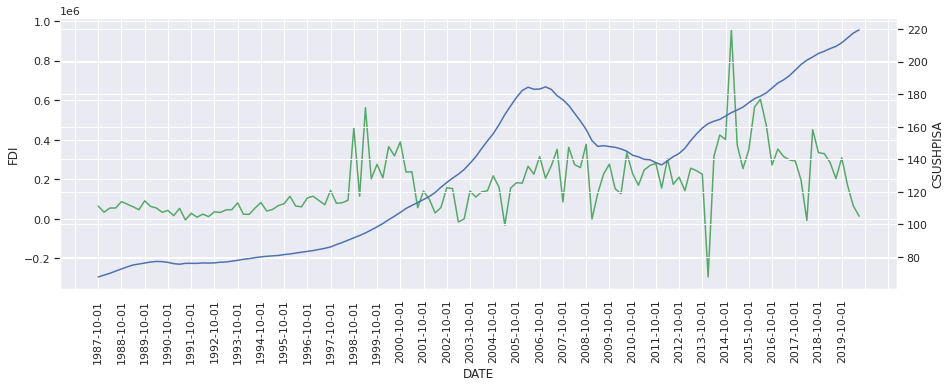

In [ ]:
FDI=pd.read_csv('Fred-FDI_quaterly.csv',names=['DATE','FDI'],header=0)
print(FDI.head())

FDI_HPI=pd.merge(FDI,HPI,on='DATE',how='inner')
print(FDI_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
#'FDI(Millions of $)'
sns.lineplot(x=FDI_HPI['DATE'],y=FDI_HPI['FDI'],color='g')
ax2=plt.twinx()
sns.lineplot(x=FDI_HPI['DATE'],y=FDI_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))

# Crime Rate  vs   Home Price Index

         DATE  Population  Total_Crime_Rate  Property_Crime_Rate
0  1987-01-01   242288918            5550.0               4940.3
1  1988-01-01   245807000            5664.2               5027.1
2  1989-01-01   248239000            5741.0               5077.9
3  1990-01-01   248709873            5820.3               5088.5
4  1991-01-01   252177000            5897.8               5139.7
         DATE  Population  ...  CSUSHPISA  HPI_%change
0  1987-01-01   242288918  ...     63.965          NaN
1  1988-01-01   245807000  ...     68.859     0.005138
2  1989-01-01   248239000  ...     73.947     0.006561
3  1990-01-01   248709873  ...     76.897     0.002503
4  1991-01-01   252177000  ...     75.914    -0.003531

[5 rows x 6 columns]


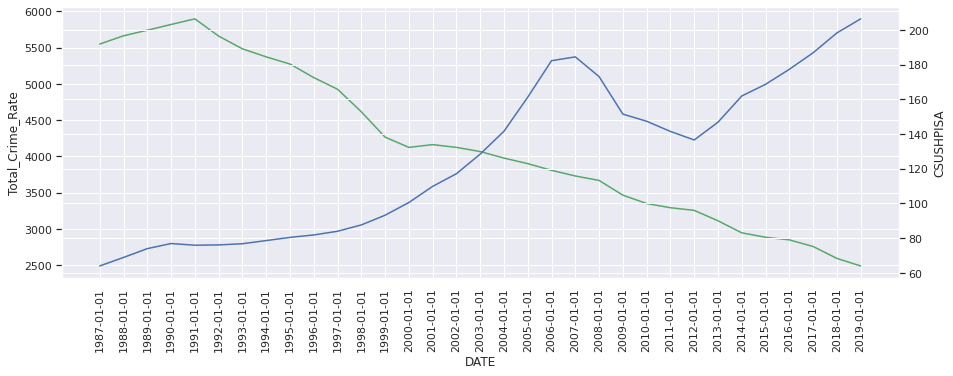

In [ ]:
Crime_rate=pd.read_excel('US_Crime_Rate_Annualy.xlsx',dtype={'Year':str},usecols=['Year','Population','Total','Property'])
Crime_rate.columns=['DATE', 'Population', 'Total_Crime_Rate', 'Property_Crime_Rate']
Crime_rate['DATE']=Crime_rate['DATE']+'-01-01'
print(Crime_rate.head())

Crime_rate_HPI=pd.merge(Crime_rate,HPI,on='DATE',how='inner')
print(Crime_rate_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)

sns.lineplot(x=Crime_rate_HPI['DATE'],y=Crime_rate_HPI['Total_Crime_Rate'],color='g')
ax2=plt.twinx()
sns.lineplot(x=Crime_rate_HPI['DATE'],y=Crime_rate_HPI['CSUSHPISA'],color='b',ax=ax2)

The above plot is inferring how low crime rates will increase a demand and the prices for a house.

# Inflation Rate vs Home Price Index

         DATE  Inflation_Rate
0  2003-01-02            1.64
1  2003-01-03            1.62
2  2003-01-06            1.63
3  2003-01-07            1.62
4  2003-01-08            1.71
         DATE  Inflation_Rate  CSUSHPISA  HPI_%change
0  2003-04-01            1.82    130.884     0.005663
1  2003-05-01            1.75    131.734     0.006494
2  2003-07-01            1.64    133.775     0.008489
3  2003-08-01            2.04    134.967     0.008910
4  2003-09-01            0.00    136.293     0.009825


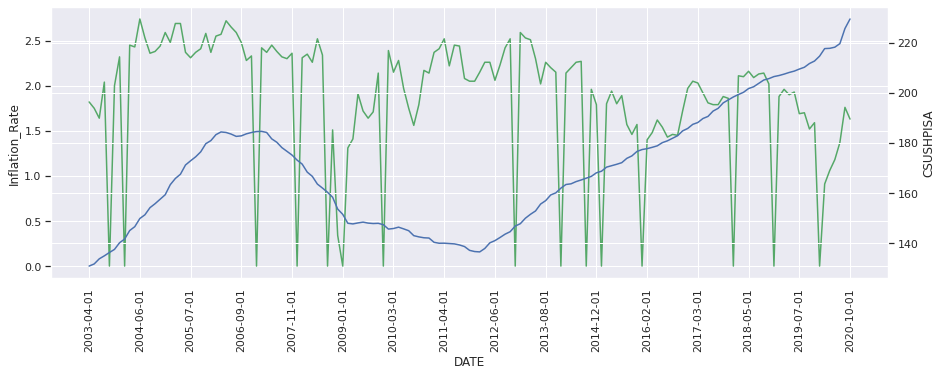

In [ ]:
Inflation_Rate=pd.read_csv('Fred-Inflationrate_daily.csv',names=['DATE','Inflation_Rate'],header=0)
Inflation_Rate['Inflation_Rate']=Inflation_Rate['Inflation_Rate'].replace('.',0)
Inflation_Rate['Inflation_Rate']=Inflation_Rate['Inflation_Rate'].astype('float64')
print(Inflation_Rate.head())

InflationR_HPI=pd.merge(Inflation_Rate,HPI,on='DATE',how='inner')
print(InflationR_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
#'Inflation_Rate(%)'
sns.lineplot(x=InflationR_HPI['DATE'],y=InflationR_HPI['Inflation_Rate'],color='g')
ax2=plt.twinx()
sns.lineplot(x=InflationR_HPI['DATE'],y=InflationR_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Mortgage Rate vs Home Price Index

         DATE  Mortgage_Rate_Avg
0  1987-01-02               9.37
1  1987-01-09               9.32
2  1987-01-16               9.21
3  1987-01-23               9.04
4  1987-01-30               9.08
         DATE  Mortgage_Rate_Avg  CSUSHPISA  HPI_%change
0  1987-05-01              10.47     65.569     0.006663
1  1988-04-01              10.05     69.975     0.004854
2  1988-07-01              10.39     71.353     0.006588
3  1989-09-01              10.22     76.056     0.002914
4  1989-12-01               9.74     76.705     0.002444


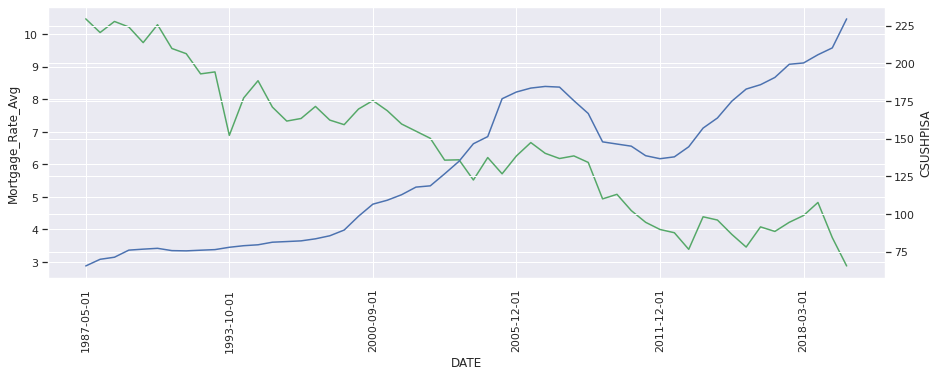

In [ ]:
Mortgage_rate=pd.read_csv('Fred-Mortgage_weekly.csv',names=['DATE','Mortgage_Rate_Avg'],header=0)
print(Mortgage_rate.head())

MortgageR_HPI=pd.merge(Mortgage_rate,HPI,on='DATE',how='inner')
print(MortgageR_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
#'Mortgage_Rate_Avg.(%)'
sns.lineplot(x=MortgageR_HPI['DATE'],y=MortgageR_HPI['Mortgage_Rate_Avg'],color='g')
ax2=plt.twinx()
sns.lineplot(x=MortgageR_HPI['DATE'],y=MortgageR_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

Above plot shows the inverse relation of Mortgage rate & Home price index. Though there are fluctuations in the plot, the moving average  explains the HPI increase with the decrease in Mortgage rate 

# Natural Disaster vs Home Price Index

         DATE  Natural_disaster_losses
0  1971-01-01                      0.2
1  1971-04-01                      0.0
2  1971-07-01                      0.0
3  1971-10-01                      0.0
4  1972-01-01                      0.0
         DATE  Natural_disaster_losses  CSUSHPISA  HPI_%change
0  1987-01-01                      0.0     63.965          NaN
1  1987-04-01                      0.0     65.135     0.006163
2  1987-07-01                      0.0     66.509     0.006553
3  1987-10-01                      0.0     67.740     0.006074
4  1988-01-01                      0.0     68.859     0.005138


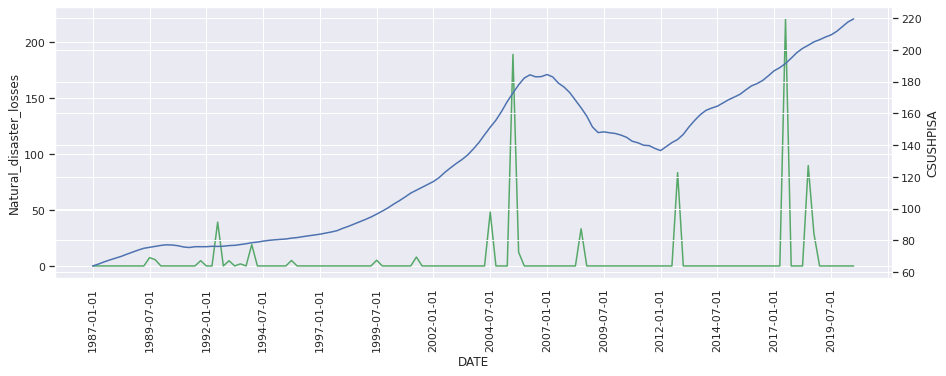

In [ ]:
Ntrl_disaster=pd.read_csv('Fred-Disaster-quaterly.csv',names=['DATE','Natural_disaster_losses'],header=0)
print(Ntrl_disaster.head())

NDisaster_HPI=pd.merge(Ntrl_disaster,HPI,on='DATE',how='inner')
print(NDisaster_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
'Natural disaster losses(Billion $)'
sns.lineplot(x=NDisaster_HPI['DATE'],y=NDisaster_HPI['Natural_disaster_losses'],color='g')
ax2=plt.twinx()
sns.lineplot(x=NDisaster_HPI['DATE'],y=NDisaster_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Housing Starts vs Home Price Index

         DATE   HOUST
0  1987-01-01  1774.0
1  1987-02-01  1784.0
2  1987-03-01  1726.0
3  1987-04-01  1614.0
4  1987-05-01  1628.0
         DATE   HOUST  CSUSHPISA  HPI_%change
0  1987-01-01  1774.0     63.965          NaN
1  1987-02-01  1784.0     64.425     0.007191
2  1987-03-01  1726.0     64.736     0.004827
3  1987-04-01  1614.0     65.135     0.006163
4  1987-05-01  1628.0     65.569     0.006663


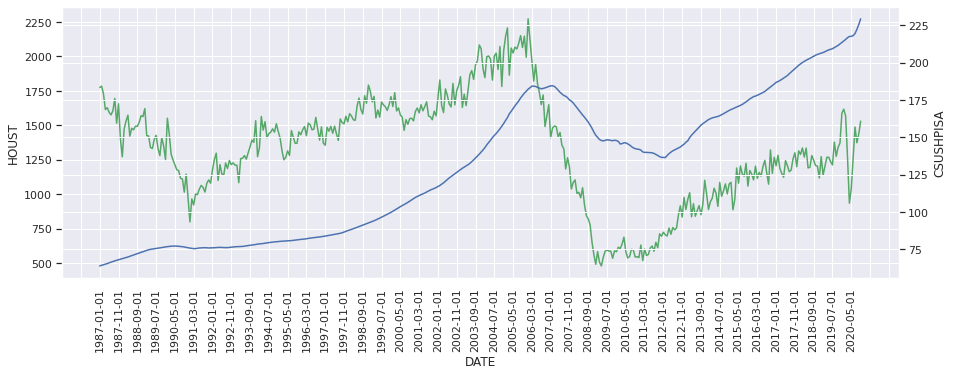

In [ ]:
Houst=pd.read_csv('Fred-housingstarts_monthly.csv')
print(Houst.head())
Houst_HPI=pd.merge(Houst,HPI,on='DATE',how='inner')
print(Houst_HPI.head())

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)

sns.lineplot(x=Houst_HPI['DATE'],y=Houst_HPI['HOUST'],color='g')
ax2=plt.twinx()
sns.lineplot(x=Houst_HPI['DATE'],y=Houst_HPI['CSUSHPISA'],color='b',ax=ax2)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Features affecting Home Price Index

In [ ]:
I_GDP=pd.merge(Income,GDP,on='DATE',how='right')
I_GDP_T=pd.merge(I_GDP,Income_tax,on='DATE',how='left')
I_GDP_T.ffill(axis=0,inplace=True)
print(I_GDP_T.head(3))
f1=pd.merge(Population,I_GDP_T,on='DATE',how='right')
print(f1.head(3))
f2=pd.merge(f1,Employment_rate,on='DATE',how='left')
print(f2.head(3))
Mortgage=pd.merge(Mortgage_rate,f2[['DATE']],on='DATE',how='outer')
Mortgage.sort_values(by='DATE',inplace=True)
Mortgage.bfill(axis=0,inplace=True)
f3=pd.merge(f2,Mortgage,on='DATE',how='left')
print(f3.head(3))
f4=pd.merge(f3,Property_tax,on='DATE',how='left')
f4.ffill(axis=0, inplace=True)
print(f4.head(3))
f5=pd.merge(f4,FDI,on='DATE',how='left')
f5.bfill(axis=0,inplace=True)
print(f5.head(3))
f6=pd.merge(f5,Houst,on='DATE',how='left')
print(f6.head(3))
f7=pd.merge(f6,HPI,on='DATE',how='left')
print(f7.head(3))
USA_HPI=f7.copy()
print(USA_HPI.head())

         DATE  Household_Income       GDP  Income_Tax
0  1987-01-01           56261.0  4722.156        38.5
1  1987-04-01           56261.0  4806.160        38.5
2  1987-07-01           56261.0  4884.555        38.5
         DATE  Population  Household_Income       GDP  Income_Tax
0  1987-01-01    241857.0           56261.0  4722.156        38.5
1  1987-04-01    242338.0           56261.0  4806.160        38.5
2  1987-07-01    242908.0           56261.0  4884.555        38.5
         DATE  Population  ...  Income_Tax  Employment_rate
0  1987-01-01    241857.0  ...        38.5        70.151216
1  1987-04-01    242338.0  ...        38.5        70.513478
2  1987-07-01    242908.0  ...        38.5        70.795038

[3 rows x 6 columns]
         DATE  Population  ...  Employment_rate  Mortgage_Rate_Avg
0  1987-01-01    241857.0  ...        70.151216               9.37
1  1987-04-01    242338.0  ...        70.513478               9.26
2  1987-07-01    242908.0  ...        70.795038          

In [ ]:
#Detemining the X, Y Varuables
X=USA_HPI.drop(columns=['DATE','CSUSHPISA'])
X.drop(['HPI_%change'],axis=1,inplace=True)
Y=USA_HPI['CSUSHPISA']
# Standardising the feature columns
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
#Fitting the model
regression = LinearRegression()
regression.fit(X_scaled,Y)
print(regression.score(X_scaled,Y))
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print(adj_r2(X_scaled,Y))

0.9611336024747146
0.958335221852894


In [ ]:
"""x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)
regression = LinearRegression()
regression.fit(x_train,y_train)
print('Regression score for train data: '+str(regression.score(x_train,y_train)))
print('Adj. Regression score for train data: '+str(adj_r2(x_train,y_train)))
print('Regression score for test data: '+str(regression.score(x_test,y_test)))
print('Adj. Regression score for test data: '+str(adj_r2(x_test,y_test)))"""

In [ ]:
X.columns

Index(['Population', 'Household_Income', 'GDP', 'Income_Tax',
       'Employment_rate', 'Mortgage_Rate_Avg', 'Proprty_Tax_Rate', 'FDI',
       'HOUST'],
      dtype='object')

In [ ]:
USA_HPI1=USA_HPI.copy()

In [ ]:
scaler1 =StandardScaler()
USA_HPI1[['Population', 'Household_Income', 'GDP', 'Income_Tax', 'Employment_rate', 'Mortgage_Rate_Avg', 'Proprty_Tax_Rate', 'FDI','HOUST']]=scaler1.fit_transform(USA_HPI1[['Population', 'Household_Income', 'GDP', 'Income_Tax', 'Employment_rate', 'Mortgage_Rate_Avg', 'Proprty_Tax_Rate', 'FDI','HOUST']].to_numpy())
lm1 = smf.ols(formula='CSUSHPISA ~ Population + Household_Income + GDP + Income_Tax+ Employment_rate + Mortgage_Rate_Avg + Proprty_Tax_Rate + FDI + HOUST', data=USA_HPI1).fit()
lm1.conf_int()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     343.5
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.16e-83
Time:                        10:50:30   Log-Likelihood:                -489.28
No. Observations:                 135   AIC:                             998.6
Df Residuals:                     125   BIC:                             1028.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           129.1358      0.812    159.122      0.000     127.530     130.742
Population           26.5570      6.865      3.869      0.000      12.971      40.143
Household_Income      0.2291      1.701      0.135      0.893      -3.137       3.595
GDP                  32.8584      5.860      5.607      0.000      21.261      44.456
Income_Tax           -6.4634      1.044     -6.189      0.000      -8.530      -4.397
Employment_rate      -4.3202      1.581     -2.733      0.007      -7.449      -1.191
Mortgage_Rate_Avg    13.7604      3.500      3.931      0.000       6.833      20.688
Proprty_Tax_Rate      3.0256      0.872      3.471      0.001       1.301       4.751
FDI                  -0.6488      1.018     -0.637      0.525      -2.663       1.366
HOUST                11.5811      1.251      9.258      0.000       9.105      14.057
==============================================================================
Omnibus:                       18.890   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.989
Skew:                           0.928   Prob(JB):                     1.68e-05
Kurtosis:                       3.682   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Emp_rate_HPI
lm_Emp = smf.ols(formula='CSUSHPISA ~ Employment_rate ', data=Emp_rate_HPI).fit()
lm_Emp.conf_int()
lm_Emp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     110.8
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.68e-23
Time:                        10:50:31   Log-Likelihood:                -2084.5
No. Observations:                 406   AIC:                             4173.
Df Residuals:                     404   BIC:                             4181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         803.5344     64.048     12.546      0.000     677.626     929.442
Employment_rate    -9.5147      0.904    -10.525      0.000     -11.292      -7.738
==============================================================================
Omnibus:                       46.677   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.744
Skew:                           0.444   Prob(JB):                     4.24e-06
Kurtosis:                       2.179   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Pop_HPI
lm_Pop = smf.ols(formula='CSUSHPISA ~ Population ', data=Pop_HPI).fit()
lm_Pop.conf_int()
lm_Pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2614.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          1.59e-178
Time:                        10:50:31   Log-Likelihood:                -1725.5
No. Observations:                 406   AIC:                             3455.
Df Residuals:                     404   BIC:                             3463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -334.4219      9.118    -36.679      0.000    -352.346    -316.498
Population     0.0016   3.13e-05     51.132      0.000       0.002       0.002
==============================================================================
Omnibus:                       21.387   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.015
Skew:                           0.510   Prob(JB):                     2.73e-05
Kurtosis:                       2.553   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Houst_HPI
lm_Houst = smf.ols(formula='CSUSHPISA ~ HOUST ', data=Houst_HPI).fit()
lm_Houst.conf_int()
lm_Houst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.222
Date:                Wed, 17 Feb 2021   Prob (F-statistic):            0.00435
Time:                        10:50:32   Log-Likelihood:                -2129.6
No. Observations:                 406   AIC:                             4263.
Df Residuals:                     404   BIC:                             4271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1091      8.117     18.739      0.000     136.152     168.066
HOUST         -0.0169      0.006     -2.867      0.004      -0.029      -0.005
==============================================================================
Omnibus:                      267.534   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.489
Skew:                           0.262   Prob(JB):                     3.95e-07
Kurtosis:                       1.788   Cond. No.                     4.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
NDisaster_HPI
lm_NDisaster = smf.ols(formula='CSUSHPISA ~ Natural_disaster_losses ', data=NDisaster_HPI).fit()
lm_NDisaster.conf_int()
lm_NDisaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.271
Date:                Wed, 17 Feb 2021   Prob (F-statistic):             0.0407
Time:                        10:50:34   Log-Likelihood:                -706.36
No. Observations:                 135   AIC:                             1417.
Df Residuals:                     133   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 127.3660      4.020     31.679      0.000     119.414     135.318
Natural_disaster_losses     0.2962      0.143      2.067      0.041       0.013       0.580
==============================================================================
Omnibus:                       74.664   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.181
Skew:                           0.231   Prob(JB):                      0.00615
Kurtosis:                       1.736   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm_InflationR = smf.ols(formula='CSUSHPISA ~ Inflation_Rate ', data=InflationR_HPI).fit()
lm_InflationR.conf_int()
lm_InflationR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.042
Date:                Wed, 17 Feb 2021   Prob (F-statistic):             0.0832
Time:                        10:50:42   Log-Likelihood:                -693.85
No. Observations:                 151   AIC:                             1392.
Df Residuals:                     149   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        178.1427      5.368     33.188      0.000     167.536     188.749
Inflation_Rate    -4.7007      2.695     -1.744      0.083     -10.026       0.625
==============================================================================
Omnibus:                       15.169   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.452
Skew:                           0.342   Prob(JB):                       0.0241
Kurtosis:                       2.154   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm_Income= smf.ols(formula='CSUSHPISA ~ Household_Income ', data=Income_HPI).fit()
lm_Income.conf_int()
lm_Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     29.43
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           6.34e-06
Time:                        10:50:42   Log-Likelihood:                -160.87
No. Observations:                  33   AIC:                             325.7
Df Residuals:                      31   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -468.8715    109.700     -4.274      0.000    -692.605    -245.138
Household_Income     0.0100      0.002      5.425      0.000       0.006       0.014
==============================================================================
Omnibus:                        4.024   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.819
Skew:                          -0.220   Prob(JB):                        0.403
Kurtosis:                       1.937   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_FDI = smf.ols(formula='CSUSHPISA ~ FDI ', data=FDI_HPI).fit()
lm_FDI.conf_int()
lm_FDI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     38.81
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           6.00e-09
Time:                        10:50:42   Log-Likelihood:                -674.03
No. Observations:                 132   AIC:                             1352.
Df Residuals:                     130   BIC:                             1358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.9189      5.287     20.034      0.000      95.459     116.379
FDI            0.0001   2.23e-05      6.230      0.000    9.46e-05       0.000
==============================================================================
Omnibus:                        5.601   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.744
Skew:                           0.492   Prob(JB):                       0.0566
Kurtosis:                       2.724   Cond. No.                     3.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_CrimeR = smf.ols(formula='CSUSHPISA ~ Total_Crime_Rate', data=Crime_rate_HPI).fit()
lm_CrimeR.conf_int()
lm_CrimeR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CSUSHPISA   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           7.60e-14
Time:                        10:50:52   Log-Likelihood:                -141.72
No. Observations:                  33   AIC:                             287.4
Df Residuals:                      31   BIC:                             290.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          284.7214     12.914     22.048      0.000     258.383     311.059
Total_Crime_Rate    -0.0381      0.003    -12.725      0.000      -0.044      -0.032
==============================================================================
Omnibus:                        2.803   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.084
Skew:                           0.616   Prob(JB):                        0.353
Kurtosis:                       3.009   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""